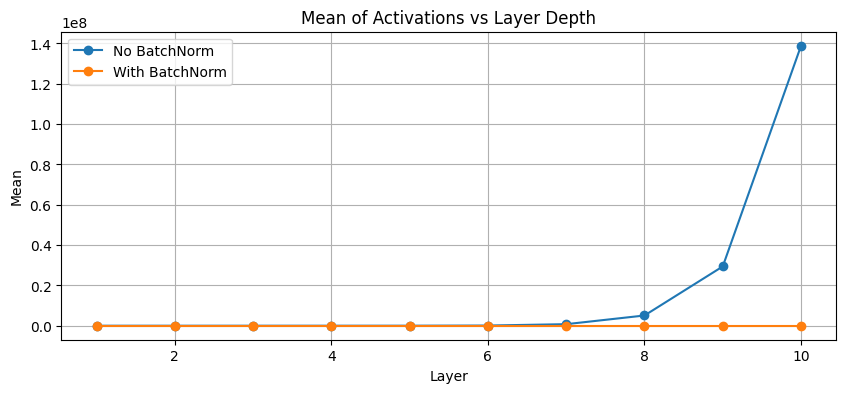

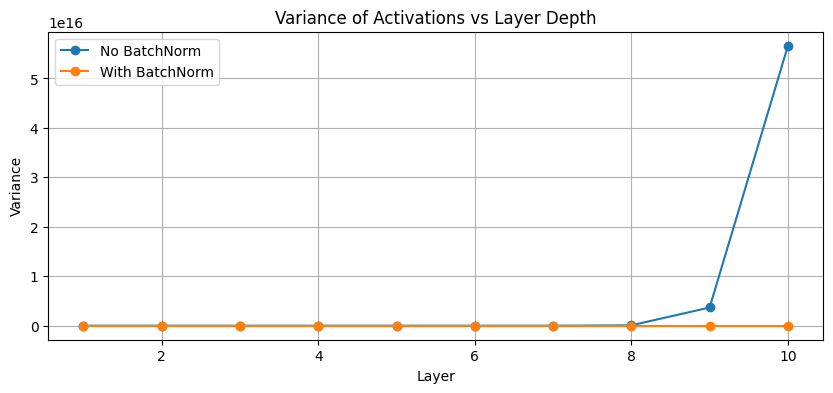

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------
# Activation
# --------------------------------
def relu(x):
    return np.maximum(0, x)

# --------------------------------
# Forward Pass
# --------------------------------
def forward_pass(X, weights, use_batchnorm=False):
    means = []
    variances = []
    
    out = X
    for W in weights:
        z = out @ W
        
        if use_batchnorm:
            mu = np.mean(z, axis=0)
            sigma = np.std(z, axis=0) + 1e-5
            z = (z - mu) / sigma
        
        out = relu(z)
        
        means.append(np.mean(out))
        variances.append(np.var(out))
    
    return means, variances

# --------------------------------
# Settings (small dataset)
# --------------------------------
np.random.seed(42)
num_layers = 10
input_dim = 50
hidden_dim = 50
num_samples = 200  # small number of points

# Bad init to exaggerate covariate shift
weights = [np.random.randn(input_dim if i == 0 else hidden_dim, hidden_dim) * 1.5
           for i in range(num_layers)]

X = np.random.randn(num_samples, input_dim)

# --------------------------------
# Compute statistics
# --------------------------------
means_no_bn, vars_no_bn = forward_pass(X, weights, use_batchnorm=False)
means_bn, vars_bn = forward_pass(X, weights, use_batchnorm=True)

layers = np.arange(1, num_layers + 1)

# --------------------------------
# Plot: Mean Across Depth
# --------------------------------
plt.figure(figsize=(10, 4))
plt.plot(layers, means_no_bn, marker='o', label='No BatchNorm')
plt.plot(layers, means_bn, marker='o', label='With BatchNorm')
plt.title("Mean of Activations vs Layer Depth")
plt.xlabel("Layer")
plt.ylabel("Mean")
plt.grid(True)
plt.legend()
plt.show()

# --------------------------------
# Plot: Variance Across Depth
# --------------------------------
plt.figure(figsize=(10, 4))
plt.plot(layers, vars_no_bn, marker='o', label='No BatchNorm')
plt.plot(layers, vars_bn, marker='o', label='With BatchNorm')
plt.title("Variance of Activations vs Layer Depth")
plt.xlabel("Layer")
plt.ylabel("Variance")
plt.grid(True)
plt.legend()
plt.show()


In [64]:
from sklearn.datasets import make_circles 

In [78]:
X,y = make_circles(n_samples=1000, noise=0.25, factor=0.5, random_state=42)

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [90]:
X = scaler.fit_transform(X)

In [91]:
import matplotlib.pyplot as plt

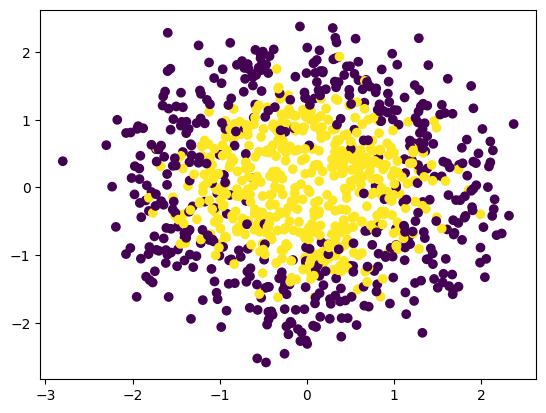

In [92]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')

In [93]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,BatchNormalization,Activation

In [94]:
input_layer = Input(shape=(2,))
x = Dense(16)(input_layer)
x = Activation('relu')(x)
output_layer = Dense(1,activation='sigmoid')(x)

non_batchnorm_model = Model(inputs=input_layer,outputs=output_layer)

In [95]:
non_batchnorm_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

In [96]:
non_batchnorm_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
non_batchnorm_model_hist = non_batchnorm_model.fit(X,y,epochs=200,batch_size=256,validation_split=0.2)

Epoch 1/200


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4950 - loss: 0.7925 - val_accuracy: 0.4250 - val_loss: 0.8408
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4950 - loss: 0.7877 - val_accuracy: 0.4200 - val_loss: 0.8347
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4938 - loss: 0.7832 - val_accuracy: 0.4200 - val_loss: 0.8288
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4938 - loss: 0.7790 - val_accuracy: 0.4200 - val_loss: 0.8233
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4938 - loss: 0.7750 - val_accuracy: 0.4250 - val_loss: 0.8182
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4950 - loss: 0.7714 - val_accuracy: 0.4250 - val_loss: 0.8132
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4950 - loss: 0.7679 - val_accuracy: 0.4250 - val_loss: 0.8087
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4938 - loss: 0.7645 - val_accuracy: 0.4250 - val_loss: 0.8042
Epoc

In [97]:
input_layer = Input(shape=(2,))
x = Dense(16)(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
output_layer = Dense(1,activation='sigmoid')(x)

batchnorm_model = Model(inputs=input_layer,outputs=output_layer)

In [98]:
batchnorm_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 32 (128.00 B)

In [99]:
batchnorm_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
batchnorm_model_hist = batchnorm_model.fit(X,y,epochs=200,batch_size=256,validation_split=0.2)

Epoch 1/200


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5113 - loss: 0.7707 - val_accuracy: 0.4800 - val_loss: 0.7064
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 0.7623 - val_accuracy: 0.4800 - val_loss: 0.7048
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5150 - loss: 0.7507 - val_accuracy: 0.4650 - val_loss: 0.7031
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5050 - loss: 0.7420 - val_accuracy: 0.4600 - val_loss: 0.7014
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5063 - loss: 0.7329 - val_accuracy: 0.4400 - val_loss: 0.6998
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 0.7241 - val_accuracy: 0.4350 - val_loss: 0.6984
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4750 - loss: 0.7170 - val_accuracy: 0.4350 - val_loss: 0.6970
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4638 - loss: 0.7086 - val_accuracy: 0.4400 - val_loss: 0.6955
Epoc

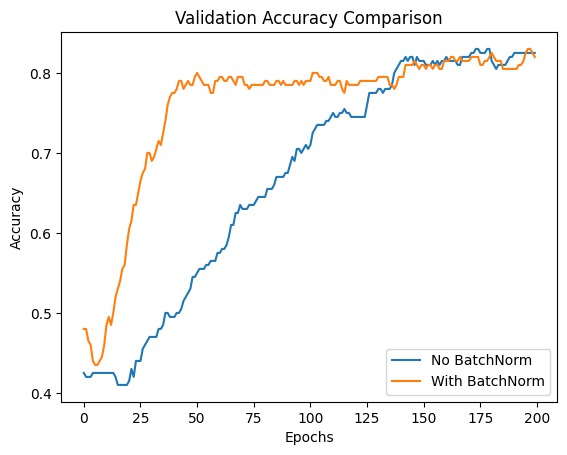

In [100]:
plt.plot(non_batchnorm_model_hist.history['val_accuracy'],label='No BatchNorm')
plt.plot(batchnorm_model_hist.history['val_accuracy'],label='With BatchNorm')
plt.title('Validation Accuracy Comparison') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()    

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 533us/step


<Axes: >

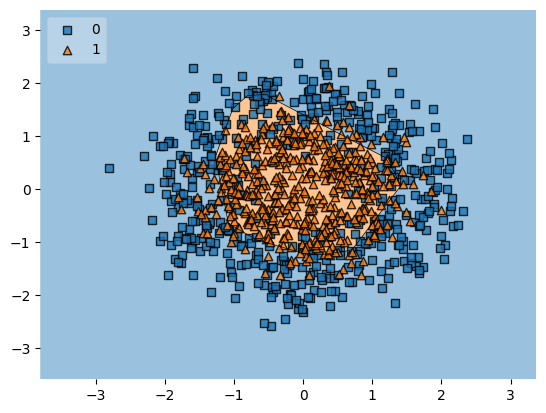

In [101]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=non_batchnorm_model, legend=2)

- overfitting

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 580us/step


<Axes: >

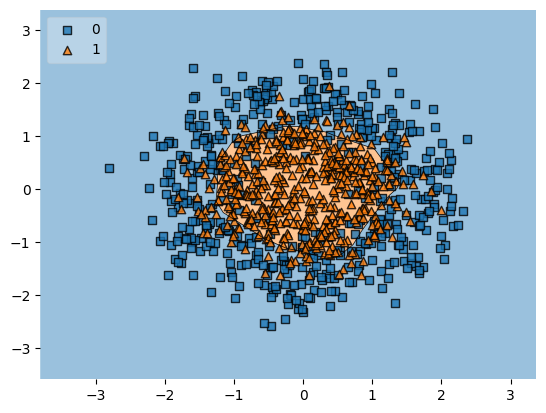

In [102]:
plot_decision_regions(X, y, clf=batchnorm_model, legend=2)